# Research on Car Sales Ads

## Purpose 

The purpose of this data analysis project is to determine what factors influence the price of a vehicle. Data analyzed for this project consists of thousands of advertisements on the Crankshaft List website over the past several years.

## Table of Contents
<a href='#General Data Information'>General Data Information</a>

<a href='#Data Preprocessing'>Data Preprocessing</a>

<a href='#Data Type Conversion'>Data Type Conversion</a>

<a href='#Exploratory Data Analysis'>Exploratory Data Analysis</a>

<a href='#Price Impact Factors'>Price Impact Factors</a>

<a href='#Overall Conclusion'>Overall Conclusion</a>

<a id='General Data Information'></a>
## General Data Information

In [142]:
#import pandas module and bring in data set as variable data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv('/datasets/vehicles_us.csv')

#Display general information regarding the data set and a look at a fragment of the data entries
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


### Duplicate Check and Removal

In addition to a general look at the data entries and attributes, the data is checked for any duplicate entries.

In [143]:
print('The total number of duplicated entries is {}'.format(data.duplicated().sum()))

The total number of duplicated entries is 0


<a id='General Data Conclusion'></a>
### General Data Conclusion

The general information on the customer data indicated there are 51,525 individual entries with none initially appearing to be obvious duplicates. Each entry contains the following attributes as defined by the data frame columns:
- `price`: Price of the vehicle
- `model_year`: Year of the vehicle
- `model`: Vehicle model
- `condition`: Vehicle's condition
- `cylinders`: Number of engine cylinders
- `fuel`: Vehicle fuel type
- `odometer`: vehicle mileage
- `transmission`: vehicle transmission type
- `type`: vehicle style
- `paint_color`: vehicle color
- `is_4wd`: whether vehicle is four wheel drive or not
- `date_posted`: date the ad posting went up
- `days_listed`: number of days from publication to removal

The attributes in the general information that immediately draw attention are: the `model_year`, `cylinders`, `odometer`, `paint_color`, and `is_4wd`. All of these attributes are missing some number of values. These missing values must be addressed later on.

<a id='Data Preprocessing'></a>
## Data Preprocessing

<a id='Processing Missing Values'></a>
### Processing Missing Values

To begin, the five attribute columns with missing values must be addressed. Each of these attributes are investigated to determine why the values are missing, whether or not to delete the data entries, and how to populate the missing values.

**`Model_year`**

A fragment of the missing data entries in the `model_year` is printed to determine if there is any pattern or signs that would explain why certain `model_year` values are missing.

In [144]:
data[data['model_year'].isna()].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60


There doesn't seem to be anything in the fragment of data shown that would indicate why the missing values are present.  The missing values are likely due to errors in how the data was gathered and stored. Since the number of missing values makes up a sizable portion of the data (~7%), these missing values shouldn't be deleted. The describe method is called on the `model_year` attribute to better understand the distribution.

In [145]:
data['model_year'].describe()

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

There is not much variance in most of the data; therefore, the missing values can be replaced with either the median or mean to avoid removing too many data entries. All of the missing values are replaced with the median value in order to maintain a whole number for the entries since `model_year` cannot be a fraction.

In [146]:
#Replace all missing values with the median of the model_year attribute
model_year_median = data['model_year'].median()
data['model_year'].fillna(model_year_median, inplace=True)

**`cylinders`**

A fragment of the missing data entries in the `cylinders` is printed to determine if there is any pattern or signs that would explain why certain `cylinders` values are missing.

In [147]:
data[data['cylinders'].isna()].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,NaN,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,NaN,NaN,2018-07-22,44
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,NaN,2018-12-20,2
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,NaN,2019-01-23,17


There doesn't seem to be anything in the fragment of data shown that would indicate why the missing values are present.  The missing values are likely due to errors in how the data was gathered and stored. Since the number of missing values makes up a sizable portion of the data (~10%), these missing values shouldn't be deleted. The describe method is called on the `cylinder` attribute to better understand the distribution.

In [148]:
data['cylinders'].describe()

count    46265.000000
mean         6.125235
std          1.660360
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

There is not much variance in most of the data; therefore, the missing values can be replaced with either the median or mean to avoid removing too many data entries. All of the missing values are replaced with the median value in order to maintain a whole number for the entries since `cylinders` cannot be a fraction.

In [149]:
#Replaces all missing values with the median value of the cylinders attribute
cylinders_median = data['cylinders'].median()
data['cylinders'].fillna(cylinders_median, inplace=True)

**`odometer`**

Since the previous attempts at looking at a fragment of the data to determine why missing values were present were unsuccessful, the missing values in the `odometer` column are assumed to also be due to errors in gathering and/or storing the data; therefore, the describe method is immediately called on the `odometer` attribute to better understand the data.

In [150]:
data['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

There is a much larger standard deviation for the `odometer` attribute than the other attributes with missing values; however, mileage is expected to be a significant factor in a vehicle's price, so these data entries cannot just be removed since they make up roughly 15% of the data. The best option is to replace these missing values with either the mean or the median. The mean value is used.

In [151]:
#Replaces all missing values with the mean of the odometer attribute
odometer_mean = data['odometer'].mean()
data['odometer'].fillna(odometer_mean, inplace=True)

**`paint_color`**

Since the `paint_color` attribute is an open ended response for the dozens of potential paint colors, a median or mean value cannot be used to replace the missing values. Instead, the missing values are simply grouped into an 'unknown' category.

In [152]:
#Replaces all missing values with an 'unknown' title
data['paint_color'].fillna('unknown', inplace=True)

**`is_4wd`**

The `is_4wd` column is a Boolean type attribute, so all the missing values in this column are expected to be *False* values.  Since the *True* values are designated with a value of 1.0, the *False* values will be changed to a value of 0.0. The unique values in the `is_4wd` column are then returned to ensure all missing values have been dealt with, and that there are no other unusual values present.

In [153]:
#Replaces all missing values in the Boolena attribute with 0 or false
data['is_4wd'].fillna(0, inplace = True)

data['is_4wd'].unique()

array([1., 0.])

<a id='Processing Missing Values Conclusion'></a>
#### Processing Missing Values Conclusion 

All the missing values have been dealt with. It is unknown why missing values in the `model_year`, `cylinders`, and `odometer` attributes were present. It most likely was an issue with how the data was gathered and stored or that the Seller did not know the respective values for his or her vehicle and chose to not provide a value. Regardless, the median or mean value were used to replace the missing values as to not affect the correlations in the data too drastically.

<a id='Data Type Conversion'></a>
## Data Type Conversion

Since the `date_posted` values may be useful in analyzing the data provided, the string values that currently make up this attribute must be converted to datetime64 to allow for it to be compared with the other time-dependent attributes such as `model_year` and `days_listed`. In addition, the values in the `model_year`, `odometer`, and `cylinders` attributes can be converted to integers, as none of these attributes are fractional values, or provide value as fractions (mileage). This conversion is not necessary, but makes these attributes much more readable.

In [154]:
#Converts the string values to DateTime64
data['date_posted'] = pd.to_datetime(data['date_posted'])
#Converts all float values to integer
data['model_year'] = data['model_year'].astype('int')
data['odometer'] = data['odometer'].astype('int')
data['cylinders'] = data['cylinders'].astype('int')

<a id='Data Conversion Conclusion'></a>
#### Data Conversion Conclusion

Now that the data is preprocessed, additional information and attributes that will be useful for exploratory data analysis can be added to the table.

<a id='Additional Data Columns'></a>
### Additional Data Columns

The following data will be added to the original DataFrame: day of the week, month, and year the vehicle ad was placed; the vehicle's age at the time the ad was placed; and the vehicle's average mileage per year. These new attributes will be more useful for determining how certain parameters, such as vehicle age, actually affect the price of the vehicle since this dataset contains ads placed over a range of years, so looking strictly at the vehicle's model year does not tell the entire story. In addition, the `condition` attribute is replaced with a numeric scale from 0-5 that corresponds with a specific condition.

<a id='Addition of Day of the Week, Month, and Year'></a>
#### Addition of Day of the Week, Month, and Year

The day of the week, month of the year, and year each ad was placed are added to the table in their respective columns.

In [155]:
#Converts date_posted to weekday value. Weekday values are applied to the day_look_up dictionary to get the corresponding
#Weekday abbreviation
data['calendar_day_posted'] = data['date_posted'].dt.weekday
day_look_up = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thur', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
data['calendar_day_posted'] = data['calendar_day_posted'].apply(lambda x: day_look_up[x])

#Converts date_posted to month value. Month values are applied to the month_look_up dictionary to get the corresponding
#month abbreviation
data['month_posted'] = data['date_posted'].dt.month
month_look_up = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
data['month_posted'] = data['month_posted'].apply(lambda x: month_look_up[x])

data['year_posted'] = data['date_posted'].dt.year

<a id='Addition of Vehicles Age'></a>
#### Addition of Vehicle's Age

The vehicle's age at the time of ad placement is calculated by taking the year that the ad was posted minus the vehicle model year. It is noted that this age is more of an estimate as opposed to a specific. The reason for this is that the month that the ad was placed is not taken into account, and the month that the vehicle was actually manufactured is not accounted for. Although there is this small discrepancy, it should have minimal impact.

In [156]:
#Stores the vehicle's estimated age in a new vehicle_age_years column
data['vehicle_age_years'] = data['date_posted'].dt.year - data['model_year']

<a id='Addition of Vehicles Average Mileage per Year'></a>
#### Addition of Vehicle's Average Mileage per Year

The vehicle's mileage per year is calculated by taking the `odometer` value divided by the estimated vehicle's age in years. Based on the slightl age discrepancy mentioned above, this value will also not be exact; however, for the purpose of this data analysis, the resulting mileage per year should be sufficient.

In [157]:
#Stores the vehicle's average mileage per year in a new mileage_per_year column
data['mileage_per_year'] = round(data['odometer']/data['vehicle_age_years'], 0)

<a id='Condition Modification'></a>
### Condition Modification

Each of the possible responses to the `condition` attribute are converted to a numerical scale. This will allow the distribution of responses to be evaluated and visually displayed better via a histogram. In addition, it will allow for the `condition` to be  correlated to the other attributes.

In [158]:
#Purpose of this function is to take each condition from the DataFrame and categorize into into a numerical scale
#with 0 being salvage, 1 being fair, 2 being good, 3 being excellent, 4 being like new, and 5 being new.
def condition_group(condition):
    if condition == 'new':
        return 5
    elif condition == 'like new':
        return 4
    elif condition == 'excellent':
        return 3
    elif condition == 'good':
        return 2
    elif condition == 'fair':
        return 1
    else:
        return 0

#Apply the condition group function to all data values in the 'condition' attribute column    
data['condition'] = data['condition'].apply(condition_group)

<a id='Data Type Conversion Conclusion'></a>
#### Data Type Conversion Conclusion

Everything seems to have been converted and added as expected. The additional columns added will be much more useful in determining what affects a vehicle's price. Exploratory data analysis can now be performed.

<a id='Exploratory Data Analysis'></a>
## Exploratory Data Analysis

#### Key Parameters
To be exploring the data, histograms for a few key attributes are plotted: `price`, `vehicle_age_years`, `odometer`, `cylinders`, and `condition`. Initially, these attributes are plotted without accounting for any set ranges based on outliers. It is expected that several of the attributes with a potentially wide range of values (i.e., `price`, `odometer`) will have outliers that degrade the clarity of the histogram.

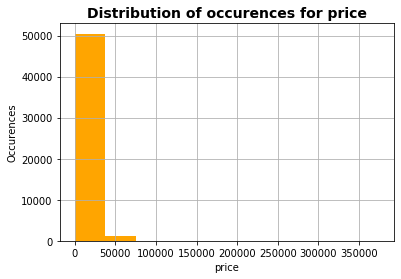

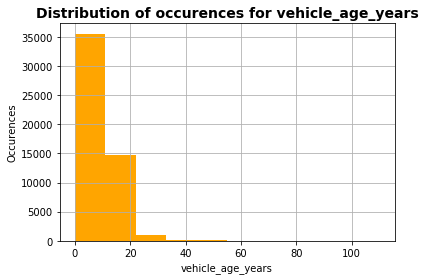

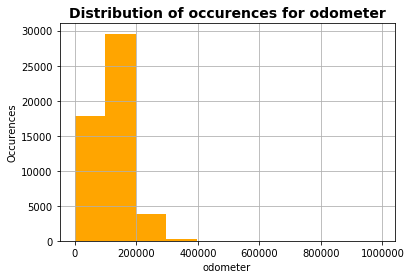

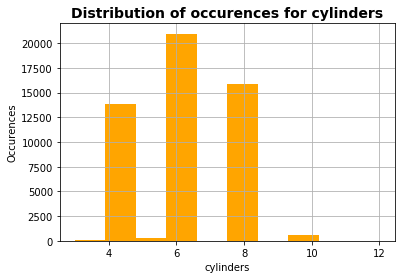

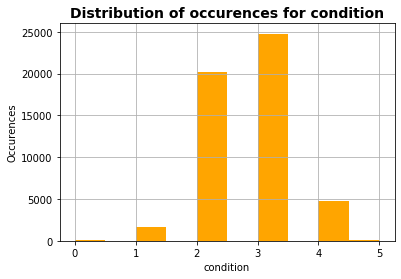

In [159]:
#Create a list of key attributes that will be analyzed further
key_attributes = ['price', 'vehicle_age_years', 'odometer', 'cylinders', 'condition']

#print a default histogram for each of the key attributes
for attribute in key_attributes:
    ax = data.hist(attribute, color = 'orange')
    for a in ax.flatten():
        a.set_xlabel(attribute)
        a.set_ylabel('Occurences')
        a.set_title('Distribution of occurences for ' + attribute, weight = 'bold', size =14)

As expected, the `price`, `vehicle_age_years`, and `odometer` histograms have outliers that make it difficult to gather any useful data from the histogram. To better understand the distribution of data for each attribute, the describe() method is used.

In [160]:
data.describe()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,year_posted,vehicle_age_years,mileage_per_year
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51523.0
mean,12132.464920,2009.838234,2.637535,6.112450,115553.391014,0.496303,39.55476,2018.307462,8.469229,inf
std,10040.803015,6.065836,0.712447,1.573784,59902.205520,0.499991,28.20427,0.461447,6.079773,NaN
min,1.000000,1908.000000,0.000000,3.000000,0.000000,0.000000,0.00000,2018.000000,0.000000,0.0
25%,5000.000000,2007.000000,2.000000,4.000000,79181.000000,0.000000,19.00000,2018.000000,4.000000,10571.0
50%,9000.000000,2011.000000,3.000000,6.000000,115553.000000,0.000000,33.00000,2018.000000,7.000000,15492.0
75%,16839.000000,2014.000000,3.000000,8.000000,146541.000000,1.000000,53.00000,2019.000000,12.000000,23111.0
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,1.000000,271.00000,2019.000000,110.000000,inf


The list of maximum values confirms that there are in fact some significant outliers. For the `price`, `vehicle_age_years`, and `odometer` attributes, upper limits are to be set, where, if a certain data entry exceeds the upper limit, that entry is considered an outlier and will be discarded from the data set. Upper limits are decided based on when occurrences seem to zero out on the initial histograms. 

The established limits are:

| **Attribute**           | **Upper Limit** |
|---------------------|-------------|
| `price`             | 75000       |
| `vehicle_age_years` | 50          |
| `odometer`          | 400000      |

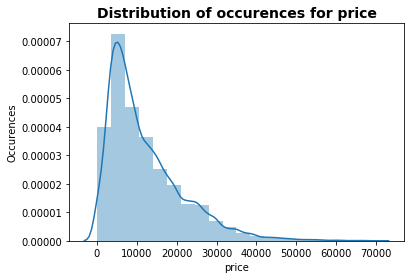

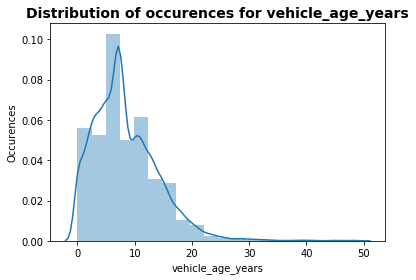

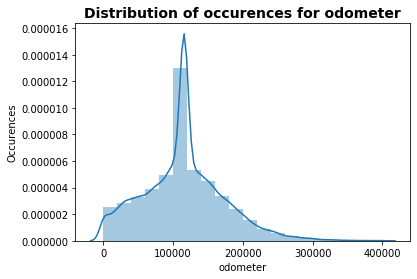

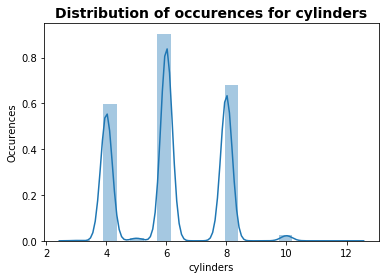

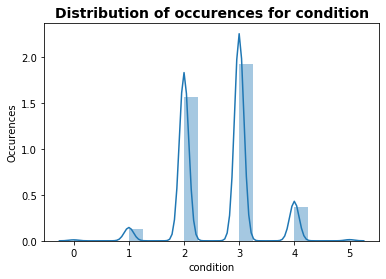

In [161]:
#Remove outliers from the data based on the upper limits set. New data is placed in good_data.
good_data = data.query('price < 75000 and vehicle_age_years < 50 and odometer < 400000')

#plot new histograms for the key attributes for the filtered data
for index, i in enumerate(key_attributes):
    plt.figure(index)
    sns.distplot(good_data[i], bins = 20)
    plt.xlabel(i)
    plt.ylabel('Occurences')
    plt.title('Distribution of occurences for ' + i, weight = 'bold', size =14)
    plt.show()

#### Conclusion
Removing the outliers makes the data much clearer and begins to show the accurate distribution of the data that previously just looked like a giant clump of data at the lower values. It also shows that many of the values close to the upper limits have a low number of occurrences. The initial upper limits could have been set lower, or another data sweep could be performed with updated values. The following information can be determined from the filtered histograms:

- The `price` histogram shows a positively skewed distribution. A majority of the vehicle prices are under 10,000 dollars with nearly all the vehicle prices under 30,000 dollars.

- The `vehicle_age_years` histogram also shows a positively skewed distribution, although a majority of the vehicle age's are around the 5-10 year range, with the numbers decreasing on both sides of that age range. 

- The `odometer` histogram shows a slight positively skewed distribution, although it is very close to a standard normal distribution. The majority of the values are around 100,000 miles, with slighlty more vehicles having more miles than that compared to less.

- The `cylinders` histogram shows that the 4, 6, and 8 cylinder engine vehicle's dominate the ads with 6 cylinder engine vehicles being the most common.

- The `condition` histogram shows that "good" (2) and "excellent" (3) vehicle conditions make up the majority of the ads, with a few vehicles being advertised as "like new".

#### Advertisement Lifetime
Next, the advertisement lifetime is analyzed to determine what factors cause a vehicle to sell quicker. The `days_listed` attribute will be plotted to better understand the data. The `good_data` will be used which already removes several outliers based on the other attributes.

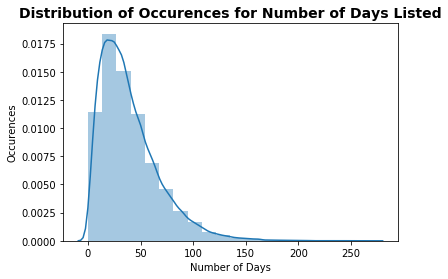

In [162]:
#Plot distribution histrogram for number of days listed
sns.distplot(good_data['days_listed'], bins = 20)
plt.xlabel('Number of Days')
plt.ylabel('Occurences')
plt.title('Distribution of Occurences for Number of Days Listed', weight = 'bold', size =14)
plt.show()

In [163]:
#calculates mean and median number of days for the good_data DataFrame
print('The mean number of days listed is {:.1f}.'.format(good_data['days_listed'].mean()))
print('The median number of days listed is {}.'.format(good_data['days_listed'].median()))

The mean number of days listed is 39.6.
The median number of days listed is 33.0.


The general distribution of the `days_listed` attribute is positively skewed. A majority of ads are listed between 0 and 80 days with the mean number of days being approximately 40 and the median number of days being 33 with the number of occurrences in each histogram bin approaching 7,000 ads at this area of the distribution.

There are quite a few (roughly 3000) ads that only remain listed between 0 and 10 days which is fast for a car ad sale, whereas, on the other hand, there are not that many that exceed 80 days of being listed. Several of the attributes, notably price, condition, and mileage, are expected to determine how quickly or slowly a vehicle gets bought; however, further investigation is done to fully quantify the situation.

In [164]:
#Prints Pearson correlation coefficient for the good_data for the key attributes with respect to days_listed
print('Correlation Data')
for attribute in key_attributes:
    print('The Pearson correlation coefficient for {} is {:.3f} with respect to days_listed.'.format(attribute, good_data['days_listed'].corr(good_data[attribute])))

Correlation Data
The Pearson correlation coefficient for price is -0.001 with respect to days_listed.
The Pearson correlation coefficient for vehicle_age_years is 0.006 with respect to days_listed.
The Pearson correlation coefficient for odometer is 0.005 with respect to days_listed.
The Pearson correlation coefficient for cylinders is 0.005 with respect to days_listed.
The Pearson correlation coefficient for condition is -0.002 with respect to days_listed.


There doesn't seem to be any clear correlations between the key attributes and the `days_listed` when looking at the entire dataset. However, there may be some correlations when the data is filtered to abnormally fast ads (0 - 10 days) or abnormally slow ads (greater than 80 days). To determine if there is a correlation, the short and long ads will be filtered into two separate dataframes to again evaluate the key attribute parameters.

In [165]:
#Filter data into two separate dataframes, fast_ads for ads where days_listed is less than 10 and slow_ads where days
#listed is greater than 80
fast_ads = good_data.query('days_listed < 10')
slow_ads = good_data.query('days_listed > 80')

#Prints Pearson correlation coefficients for both the fast_ads and the slow_ads for the key attributes with respect to
#days_listed
print('Fast Ads Correlation Data')
for attribute in key_attributes:
    print('The Pearson correlation coefficient for {} is {:.3f} with respect to days_listed.'.format(attribute, fast_ads['days_listed'].corr(fast_ads[attribute])))

print()
print('Slow Ads Correlation Data')
for attribute in key_attributes:
    print('The Pearson correlation coefficient for {} is {:.3f} with respect to days_listed.'.format(attribute, slow_ads['days_listed'].corr(slow_ads[attribute])))

Fast Ads Correlation Data
The Pearson correlation coefficient for price is -0.024 with respect to days_listed.
The Pearson correlation coefficient for vehicle_age_years is 0.002 with respect to days_listed.
The Pearson correlation coefficient for odometer is 0.009 with respect to days_listed.
The Pearson correlation coefficient for cylinders is 0.004 with respect to days_listed.
The Pearson correlation coefficient for condition is -0.023 with respect to days_listed.

Slow Ads Correlation Data
The Pearson correlation coefficient for price is -0.023 with respect to days_listed.
The Pearson correlation coefficient for vehicle_age_years is 0.015 with respect to days_listed.
The Pearson correlation coefficient for odometer is 0.013 with respect to days_listed.
The Pearson correlation coefficient for cylinders is -0.000 with respect to days_listed.
The Pearson correlation coefficient for condition is 0.006 with respect to days_listed.


#### Conclusion
Looking at the fast and slow ads, there still isn't one single attribute that has a definite effect on an ad lifetime. However, relatively speaking, for fast ads, `price` and `condition` have stronger effects, whereas for slow ads, `price` and `odometer` have stronger effects.

#### Type of Vehicle Analysis

The `good_data` will be analyzed in order to determine how the type of vehicle plays into the vehicle price and number of ads posted. To do this, a pivot table will be created that evaluates the mean price for each type of vehicle. The pivot table data will be plotted on a bar chart showing the relationship between number of vehicle ads for each type, and the average cost for each type.

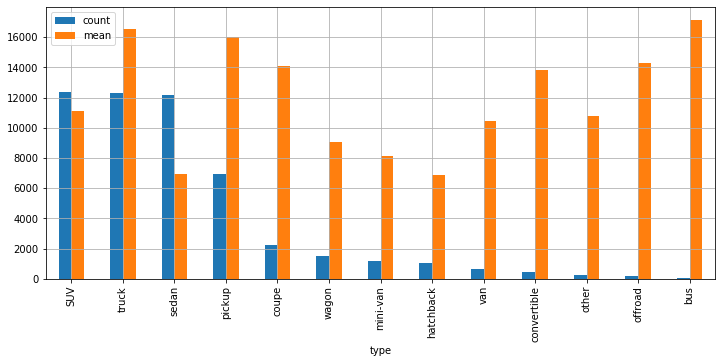

In [166]:
#Using good_data DataFrame, a pivot table is created evaluating the price of a vehicle with respect to the type of the vehicle.
#Both the mean price and number of prices (total number sold) are found. This data is then plotted with a bar chart
#in order of most types sold.
good_data.pivot_table(index = 'type', values = 'price', aggfunc={'count','mean'}).sort_values(by='count', ascending=False).plot(kind='bar', grid=True, figsize=(12,5));

#### Conclusion
The two most popular vehicle types in the posted ads are "SUV" and "truck", with "sedan" being a close third. The next most popular ad is for "pickup"; however, a pickup is typically considered to be a truck, and thus could be added into the truck type, especially since the mean prices are close. The remaining vehicle types are fairly uncommon.

<a id='Price Impact Factors'></a>
## Price Impact Factors

To determine what factors affect price the most, the two most popular vehicle type ads found in the previous section, "SUV" and "truck" are evaluated. A new DataFrame including only vehicle ads for SUVs or trucks is created.

In [167]:
#Creates new DataFrame for SUV or truck ads
top_ads_data = good_data.query('type == "SUV" | type == "truck"')

The following parameters are evaluated for their impact on vehicle price: `vehicle_age_years`, `odometer`, `condition`, `transmission` and `paint_color`. The attributes `vehicle_age_years`, `odometer` and `condition` are evaluated via scatterplots and Pearson correlation coefficients, whereas the attributes `transmission` and `paint_color` are evaluated with box-and-whisker plots.

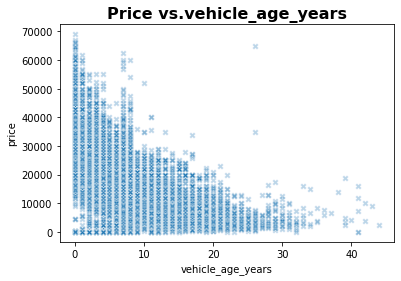

The Pearson correlation coefficient for vehicle_age_years is -0.568 with respect to price.


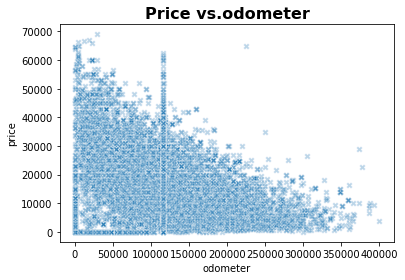

The Pearson correlation coefficient for odometer is -0.459 with respect to price.


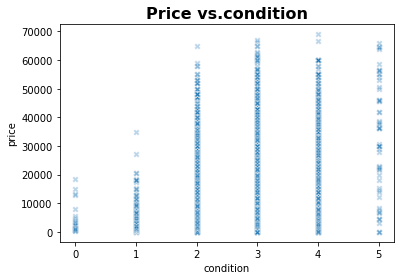

The Pearson correlation coefficient for condition is 0.284 with respect to price.


In [168]:
#Create a list of parameters considered in determining what affects price
price_parameters = ['vehicle_age_years', 'odometer', 'condition']

#plot scatterplots for each of the price parameters as well as calculate the Pearson's correlation coefficient for each
for parameter in price_parameters:
    sns.scatterplot(x = top_ads_data[parameter], y = top_ads_data['price'], marker = 'X', alpha = 0.3)
    plt.title('Price vs.'+parameter, size =16, weight = 'bold')
    plt.show()
    print('The Pearson correlation coefficient for {} is {:.3f} with respect to price.'.format(parameter, top_ads_data['price'].corr(slow_ads[parameter])))    

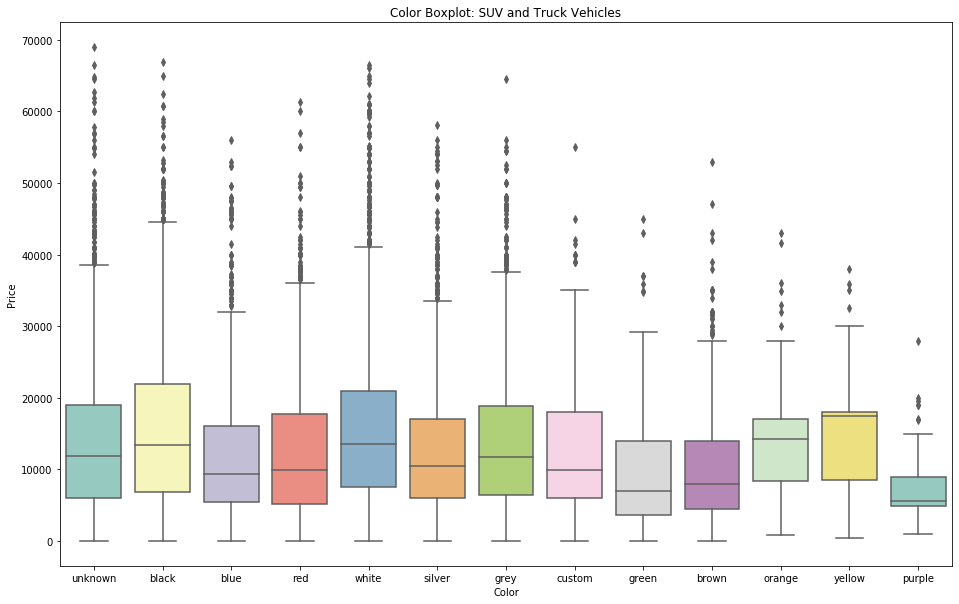

In [169]:
#Creates a boxplot for the categorical variable paint_color using seaborn library. Sets title, x-axis, and y-axis labels accordingly
fig, ax = plt.subplots(figsize = (16, 10))
sns.catplot(x='paint_color', y='price', kind = 'box', data=top_ads_data, palette = 'Set3', ax=ax)
ax.set_title("Color Boxplot: SUV and Truck Vehicles")
ax.set_xlabel('Color')
ax.set_ylabel('Price')
plt.close(2)

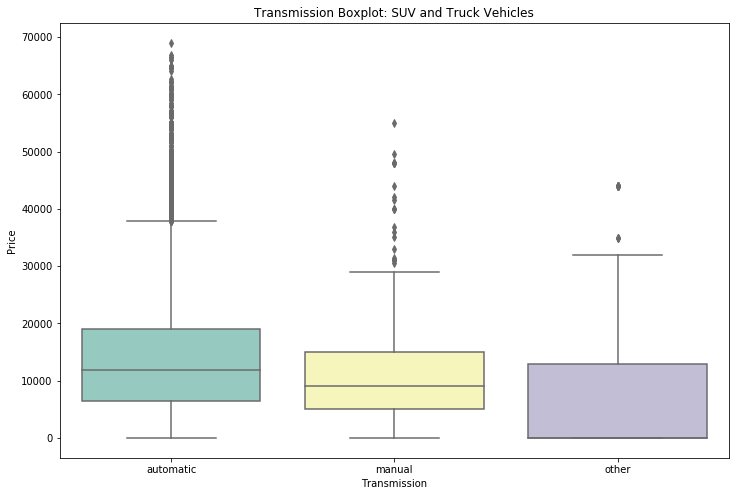

In [170]:
#Creates a boxplot for the categorical variable transmission using seaborn library. Sets title, x-axis, and y-axis labels accordingly
fig, ax = plt.subplots(figsize = (12, 8 ))
sns.catplot(x='transmission', y='price', kind = 'box', data=top_ads_data, palette = 'Set3', ax=ax)
ax.set_title("Transmission Boxplot: SUV and Truck Vehicles")
ax.set_xlabel('Transmission')
ax.set_ylabel('Price')
plt.close(2)

#### Conclusion

With a variety of plots showing how certain attributes impact price, the following conclusions can be made about each of the attributes evaluated:

- `vehicle_age_years` is the most impactful attribute that affects price with a Pearson's correlation coefficient of -0.568. As `vehicle_age_years` increases, the price decreases, as one would expect.
- `odometer` has a Pearson's correlation coefficient of -0.459. As mileage increases, the price decreases, as is expected. Although it does not have as strong a correlation as `vehicle_age_years`, it still has a significant impact on price.
- `condition` has a Pearson's correlation coefficient of 0.284. As the condition improves, so does the price. The condition only has a slight correlation with the price of the vehicle.
- For the vehicle `paint_color`, black and white have the highest average price out of the more popular colors, with white having the higher price of the two. The other more popular colors: blue, red, silver, and grey, all have roughly the same average price, with blue having the lowest price of the four. There are two atypical colors, orange and yellow, that have a very high average price. It is speculated that these colors might be sports versions of the car due to the flashy colors and thus have a higher price tag as a result.
- For `transmission`, automatic cars have a higher average and maximum price than manual transmission cars. It is noted that the other category does not provide any useful data with the given distribution, and thus can be ignored.

<a id='Overall Conclusion'></a>
## Overall Conclusion

The purpose of this project was to determine what attributes affect the price of a vehicle. 

Existing data on previous vehicle ads was provided. The existing data was preprocessed by filling in missing values, changing data types, and grouping certain attributes into a numerical scale. For certain attributes, histograms were created and outliers were discovered and subsequently removed.

To determine the correlation between the various attributes and a vehicle's price, scatterplots of certain key attributes were created with respect to price. For two categorical variables, transmission type and vehicle color, box-and-whisker plots were created to show how the data affected price. A summary of the findings is as follows:

- Out of the three most common types of vehicles (SUV, truck, sedan), trucks are on average the most expensive by approximately 5,000 dollars, followed by SUV and then sedan. It is noted that there are a few unique vehicle types such as buses that have a very high price tag, but are rarely sold.
- A vehicle's age is the most important factor in determining a vehicle's price with a strong negative correlation. The older a vehicle, the less expensive the vehicle is.
- A vehicle's mileage is also an important factor in determining a vehicle's price as it also has a strong negative correlation. The more mileage on a vehicle, the less expensive the vehicle is.
- A vehicle's condition does affect price, although not as strongly as age or mileage. Condition has a weak positive correlation with price.
- Automatic transmission vehicles are typically higher priced than manual transmission vehicles.
- Vehicle colors black and white are typically higher priced than colors such as grey, blue, red, or silver. However, the average price of most colors does not vary significantly. There are two colors, orange and yellow, that do have higher average prices than the other colors, but this is likely attributed to them being considered sporty colors.
